## Introduction

Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour.

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, we'll recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data 

In [2]:
filedata = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

In [3]:
CustDemo = pd.read_excel(filedata,'CustomerDemographic')
Trans_Data = pd.read_excel(filedata, 'Transactions')
CustAdd = pd.read_excel(filedata,'CustomerAddress')

C:\Users\HP\AppData\Local\Temp\ipykernel_6760\2324925547.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustDemo = pd.read_excel(filedata,'CustomerDemographic')


## Check data

### Customer demographic

In [4]:
CustDemo.head(2)

customer_id first_name  last_name gender  \
0            1    Laraine  Medendorp      F   
1            2        Eli    Bockman   Male   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   

  job_industry_category wealth_segment deceased_indicator  \
0                Health  Mass Customer                  N   
1    Financial Services  Mass Customer                  N   

                        default owns_car  tenure  
0                            "'      Yes    11.0  
1  <script>alert('hi')</script>      Yes    16.0

In [5]:
CustDemo.shape

(4000, 13)

In [6]:
CustDemo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [7]:
object_column = [x for x in CustDemo.select_dtypes('object').columns]

In [8]:
for kolom in object_column:
    print ('ini adalah unik value dari kolom : {}'.format(kolom))
    print (CustDemo[kolom].unique())
    print ('\n ====================================== ') 

ini adalah unik value dari kolom : first_name
['Laraine' 'Eli' 'Arlin' ... 'Stephie' 'Rusty' 'Sarene']

ini adalah unik value dari kolom : last_name
['Medendorp' 'Bockman' 'Dearle' ... 'Halgarth' 'Woolley' 'Oldland']

ini adalah unik value dari kolom : gender
['F' 'Male' 'Female' 'U' 'Femal' 'M']

ini adalah unik value dari kolom : job_title
['Executive Secretary' 'Administrative Officer' 'Recruiting Manager' nan
 'Senior Editor' 'Media Manager I' 'Business Systems Development Analyst'
 'Senior Quality Engineer' 'Nuclear Power Engineer' 'Developer I'
 'Account Executive' 'Junior Executive' 'Media Manager IV'
 'Sales Associate' 'Professor' 'Geological Engineer' 'Project Manager'
 'Safety Technician I' 'Research Assistant I' 'Accounting Assistant III'
 'Editor' 'Research Nurse' 'Safety Technician III' 'Staff Accountant III'
 'Legal Assistant' 'Product Engineer' 'Information Systems Manager'
 'VP Quality Control' 'Social Worker' 'Senior Cost Accountant'
 'Assistant Media Planner' 'Payment

In [9]:
total = CustDemo.isnull().sum().sort_values(ascending = False)
percent = round((CustDemo.isnull().sum()/CustDemo.isnull().count()*100),2).sort_values(ascending = False)
missing_CustDemo_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_CustDemo_data.head(10)

Total  Percent
job_industry_category                  656    16.40
job_title                              506    12.65
default                                302     7.55
last_name                              125     3.12
DOB                                     87     2.17
tenure                                  87     2.17
customer_id                              0     0.00
first_name                               0     0.00
gender                                   0     0.00
past_3_years_bike_related_purchases      0     0.00

In [10]:
CustDemo.duplicated().any()

False

In [11]:
CustDemo.head(3)

customer_id first_name  last_name gender  \
0            1    Laraine  Medendorp      F   
1            2        Eli    Bockman   Male   
2            3      Arlin     Dearle   Male   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   

  job_industry_category wealth_segment deceased_indicator  \
0                Health  Mass Customer                  N   
1    Financial Services  Mass Customer                  N   
2              Property  Mass Customer                  N   

                        default owns_car  tenure  
0                            "'      Yes    11.0  
1  <script>alert('hi')</script>      Yes    16.0  
2           2018-02-01 00:00:00      Yes    15.0

### Transaction

In [12]:
Trans_Data.head(2)

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   

  order_status          brand product_line product_class product_size  \
0     Approved          Solex     Standard        medium       medium   
1     Approved  Trek Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62                  41245.0  
1     2091.47         388.92                  41701.0

In [13]:
Trans_Data.shape

(20000, 13)

In [14]:
Trans_Data.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [15]:
object_column = [x for x in Trans_Data.select_dtypes('object').columns]

In [16]:
for kolom in object_column:
    print ('ini adalah unik value dari kolom : {}'.format(kolom))
    print (Trans_Data[kolom].unique())
    print ('\n ====================================== ') 

ini adalah unik value dari kolom : order_status
['Approved' 'Cancelled']

ini adalah unik value dari kolom : brand
['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]

ini adalah unik value dari kolom : product_line
['Standard' 'Road' 'Mountain' 'Touring' nan]

ini adalah unik value dari kolom : product_class
['medium' 'low' 'high' nan]

ini adalah unik value dari kolom : product_size
['medium' 'large' 'small' nan]



In [17]:
total = Trans_Data.isnull().sum().sort_values(ascending = False)
percent = round((Trans_Data.isnull().sum()/Trans_Data.isnull().count()*100),2).sort_values(ascending = False)
missing_Trans_Data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_Trans_Data.head(10)

Total  Percent
online_order               360     1.80
brand                      197     0.98
product_line               197     0.98
product_class              197     0.98
product_size               197     0.98
standard_cost              197     0.98
product_first_sold_date    197     0.98
transaction_id               0     0.00
product_id                   0     0.00
customer_id                  0     0.00

In [18]:
Trans_Data.duplicated().any()

False

### CustAdd

In [19]:
CustAdd.shape

(3999, 6)

In [20]:
object_column = [x for x in CustAdd.select_dtypes('object').columns]

In [21]:
for kolom in object_column:
    print ('ini adalah unik value dari kolom : {}'.format(kolom))
    print (CustAdd[kolom].unique())
    print ('\n ====================================== ') 

ini adalah unik value dari kolom : address
['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']

ini adalah unik value dari kolom : state
['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']

ini adalah unik value dari kolom : country
['Australia']



In [22]:
total = CustAdd.isnull().sum().sort_values(ascending = False)
percent = round((CustAdd.isnull().sum()/CustAdd.isnull().count()*100),2).sort_values(ascending = False)
missing_CustAdd  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_CustAdd.head(10)

Total  Percent
customer_id             0      0.0
address                 0      0.0
postcode                0      0.0
state                   0      0.0
country                 0      0.0
property_valuation      0      0.0

In [23]:
CustAdd.duplicated().any()

False

## Cleaning the data and handle missing value

### customer demographic

In [24]:
#replace M as Male and F/Femal as Female
CustDemo.loc[CustDemo['gender'] == 'M']

customer_id first_name last_name gender  \
56           57       Abba   Masedon      M   

    past_3_years_bike_related_purchases        DOB              job_title  \
56                                   87 1988-06-13  Chief Design Engineer   

   job_industry_category wealth_segment deceased_indicator default owns_car  \
56                   NaN  Mass Customer                  N     100      Yes   

    tenure  
56    13.0

In [25]:
CustDemo['gender'].replace({"M": "Male"}, inplace=True)

In [26]:
CustDemo['gender'].replace({"F": "Female"}, inplace=True)
CustDemo['gender'].replace({"Femal": "Female"}, inplace=True)

In [27]:
CustDemo.loc[CustDemo['gender'] == 'U']

customer_id first_name   last_name gender  \
33             34   Jephthah    Bachmann      U   
143           144       Jory  Barrabeale      U   
167           168     Reggie   Broggetti      U   
266           267      Edgar     Buckler      U   
289           290    Giorgio      Kevane      U   
...           ...        ...         ...    ...   
3778         3779      Ulick      Daspar      U   
3882         3883      Nissa      Conrad      U   
3930         3931      Kylie       Epine      U   
3934         3935     Teodor   Alfonsini      U   
3997         3998     Sarene     Woolley      U   

      past_3_years_bike_related_purchases        DOB               job_title  \
33                                     59 1843-12-21         Legal Assistant   
143                                    71        NaT      Environmental Tech   
167                                     8        NaT         General Manager   
266                                    53        NaT                     NaN   
289                                    42        NaT  Senior Sales Associate   
...                                   ...        ...                     ...   
3778                                   68        NaT                     NaN   
3882                                   35        NaT         Legal Assistant   
3930                                   19        NaT                     NaN   
3934                                   72        NaT                     NaN   
3997                                   60        NaT       Assistant Manager   

     job_industry_category     wealth_segment deceased_indicator default  \
33                      IT  Affluent Customer                  N     NaN   
143                     IT      Mass Customer                  N     NaN   
167                     IT  Affluent Customer                  N     NaN   
266                     IT     High Net Worth                  N     NaN   
289                     IT      Mass Customer                  N     NaN   
...                    ...                ...                ...     ...   
3778                    IT  Affluent Customer                  N     NaN   
3882                    IT      Mass Customer                  N     NaN   
3930                    IT     High Net Worth                  N     NaN   
3934                    IT     High Net Worth                  N     NaN   
3997                    IT     High Net Worth                  N     NaN   

     owns_car  tenure  
33         No    20.0  
143        No     NaN  
167       Yes     NaN  
266        No     NaN  
289        No     NaN  
...       ...     ...  
3778       No     NaN  
3882       No     NaN  
3930      Yes     NaN  
3934      Yes     NaN  
3997       No     NaN  

[88 rows x 13 columns]

In [28]:
CustDemo['gender'].replace({"U": "Other"}, inplace=True)

In [29]:
#CustDemo=CustDemo[CustDemo.gender!="U"]

In [30]:
CustDemo.head(2)

customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            2        Eli    Bockman    Male   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   

  job_industry_category wealth_segment deceased_indicator  \
0                Health  Mass Customer                  N   
1    Financial Services  Mass Customer                  N   

                        default owns_car  tenure  
0                            "'      Yes    11.0  
1  <script>alert('hi')</script>      Yes    16.0

In [31]:
CustDemo['job_title'].fillna("Not known",inplace=True)
CustDemo['job_industry_category'].fillna("Not known",inplace=True)

In [32]:
CustDemo['DOB'] = CustDemo['DOB'].fillna(CustDemo['DOB'].mode()[0])

In [33]:
CustDemo.drop('default',axis=1,inplace= True)

In [34]:
CustDemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  4000 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [35]:
import datetime as dt
from datetime import datetime

#convert date to age
def from_dob_to_age(born):
    today = dt.date.today()
    return today.year - born.year -((today.month,today.day) < (born.month,born.day))

In [36]:
CustDemo['Age']= CustDemo['DOB'].apply(lambda x: from_dob_to_age(x))

In [37]:
CustDemo.head(2)

customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            2        Eli    Bockman    Male   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   

  job_industry_category wealth_segment deceased_indicator owns_car  tenure  \
0                Health  Mass Customer                  N      Yes    11.0   
1    Financial Services  Mass Customer                  N      Yes    16.0   

   Age  
0   69  
1   42

In [38]:
object_column = [x for x in CustDemo.select_dtypes('object').columns]

In [39]:
for kolom in object_column:
    print ('ini adalah unik value dari kolom : {}'.format(kolom))
    print (CustDemo[kolom].unique())
    print ('\n ====================================== ') 

ini adalah unik value dari kolom : first_name
['Laraine' 'Eli' 'Arlin' ... 'Stephie' 'Rusty' 'Sarene']

ini adalah unik value dari kolom : last_name
['Medendorp' 'Bockman' 'Dearle' ... 'Halgarth' 'Woolley' 'Oldland']

ini adalah unik value dari kolom : gender
['Female' 'Male' 'Other']

ini adalah unik value dari kolom : job_title
['Executive Secretary' 'Administrative Officer' 'Recruiting Manager'
 'Not known' 'Senior Editor' 'Media Manager I'
 'Business Systems Development Analyst' 'Senior Quality Engineer'
 'Nuclear Power Engineer' 'Developer I' 'Account Executive'
 'Junior Executive' 'Media Manager IV' 'Sales Associate' 'Professor'
 'Geological Engineer' 'Project Manager' 'Safety Technician I'
 'Research Assistant I' 'Accounting Assistant III' 'Editor'
 'Research Nurse' 'Safety Technician III' 'Staff Accountant III'
 'Legal Assistant' 'Product Engineer' 'Information Systems Manager'
 'VP Quality Control' 'Social Worker' 'Senior Cost Accountant'
 'Assistant Media Planner' 'Payment Ad

### transaction

In [40]:
Trans_Data.head(2)

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   

  order_status          brand product_line product_class product_size  \
0     Approved          Solex     Standard        medium       medium   
1     Approved  Trek Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62                  41245.0  
1     2091.47         388.92                  41701.0

In [41]:
Trans_Data['online_order'] = Trans_Data['online_order'].fillna(Trans_Data['online_order'].mode()[0]) 
Trans_Data['online_order']

0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
19995    1.0
19996    1.0
19997    1.0
19998    0.0
19999    1.0
Name: online_order, Length: 20000, dtype: float64

In [42]:
Trans_Data.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [43]:
transs = Trans_Data.dropna()

In [44]:
transs.head(1)

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   

  order_status  brand product_line product_class product_size  list_price  \
0     Approved  Solex     Standard        medium       medium       71.49   

   standard_cost  product_first_sold_date  
0          53.62                  41245.0

In [45]:
transs['product_first_sold_date'] = transs['product_first_sold_date'].astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_6760\3949991428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transs['product_first_sold_date'] = transs['product_first_sold_date'].astype(int)


In [46]:
transs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [47]:
import datetime as dt
from datetime import datetime

def convert_to_datetime(num):
    dt = datetime.fromordinal(datetime(1900,1,1).toordinal() + num -2)
    return dt

In [48]:
transs['product_first_sold_date'] = transs['product_first_sold_date'].apply(convert_to_datetime)

C:\Users\HP\AppData\Local\Temp\ipykernel_6760\2813138586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transs['product_first_sold_date'] = transs['product_first_sold_date'].apply(convert_to_datetime)


In [49]:
transs.head(2)

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   

  order_status          brand product_line product_class product_size  \
0     Approved          Solex     Standard        medium       medium   
1     Approved  Trek Bicycles     Standard        medium        large   

   list_price  standard_cost product_first_sold_date  
0       71.49          53.62              2012-12-02  
1     2091.47         388.92              2014-03-03

In [50]:
transs['trans_year'] = transs['transaction_date'].dt.year
transs['trans_month'] = transs['transaction_date'].dt.month_name()
transs['trans_day'] = transs['transaction_date'].dt.day
transs['day_of_the week'] = transs['transaction_date'].dt.day_name()

C:\Users\HP\AppData\Local\Temp\ipykernel_6760\2827134396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transs['trans_year'] = transs['transaction_date'].dt.year
C:\Users\HP\AppData\Local\Temp\ipykernel_6760\2827134396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transs['trans_month'] = transs['transaction_date'].dt.month_name()
C:\Users\HP\AppData\Local\Temp\ipykernel_6760\2827134396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [51]:
transs['trans_year'] = transs['trans_year'].astype(str)
transs['trans_day'] = transs['trans_day'].astype(str)

C:\Users\HP\AppData\Local\Temp\ipykernel_6760\272441888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transs['trans_year'] = transs['trans_year'].astype(str)
C:\Users\HP\AppData\Local\Temp\ipykernel_6760\272441888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transs['trans_day'] = transs['trans_day'].astype(str)


In [52]:
transs.head(2)

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   

  order_status          brand product_line product_class product_size  \
0     Approved          Solex     Standard        medium       medium   
1     Approved  Trek Bicycles     Standard        medium        large   

   list_price  standard_cost product_first_sold_date trans_year trans_month  \
0       71.49          53.62              2012-12-02       2017    February   
1     2091.47         388.92              2014-03-03       2017         May   

  trans_day day_of_the week  
0        25        Saturday  
1        21          Sunday

In [53]:
object_column = [x for x in transs.select_dtypes('object').columns]

In [54]:
for kolom in object_column:
    print ('ini adalah unik value dari kolom : {}'.format(kolom))
    print (transs[kolom].unique())
    print ('\n ====================================== ') 

ini adalah unik value dari kolom : order_status
['Approved' 'Cancelled']

ini adalah unik value dari kolom : brand
['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B']

ini adalah unik value dari kolom : product_line
['Standard' 'Road' 'Mountain' 'Touring']

ini adalah unik value dari kolom : product_class
['medium' 'low' 'high']

ini adalah unik value dari kolom : product_size
['medium' 'large' 'small']

ini adalah unik value dari kolom : trans_year
['2017']

ini adalah unik value dari kolom : trans_month
['February' 'May' 'October' 'August' 'March' 'April' 'July' 'January'
 'September' 'June' 'December' 'November']

ini adalah unik value dari kolom : trans_day
['25' '21' '16' '31' '1' '8' '15' '10' '30' '17' '5' '26' '11' '3' '2' '6'
 '28' '9' '29' '18' '23' '13' '20' '7' '12' '14' '22' '24' '27' '19' '4']

ini adalah unik value dari kolom : day_of_the week
['Saturday' 'Sunday' 'Monday' 'Thursday' 'Wednesday' 'Friday' 'Tuesday']



### customer address

In [55]:
CustAdd.head(2)

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   

   property_valuation  
0                  10  
1                  10

In [56]:
CustAdd['state'].replace({"New South Wales": "NSW"}, inplace=True)
CustAdd['state'].replace({"Victoria": "VIC"}, inplace=True)

In [57]:
CustAdd.head(11)

customer_id                  address  postcode state    country  \
0             1       060 Morning Avenue      2016   NSW  Australia   
1             2      6 Meadow Vale Court      2153   NSW  Australia   
2             4       0 Holy Cross Court      4211   QLD  Australia   
3             5      17979 Del Mar Point      2448   NSW  Australia   
4             6         9 Oakridge Court      3216   VIC  Australia   
5             7         4 Delaware Trail      2210   NSW  Australia   
6             8      49 Londonderry Lane      2650   NSW  Australia   
7             9          97736 7th Trail      2023   NSW  Australia   
8            11     93405 Ludington Park      3044   VIC  Australia   
9            12  44339 Golden Leaf Alley      4557   QLD  Australia   
10           13      2 Sutherland Street      3799   VIC  Australia   

    property_valuation  
0                   10  
1                   10  
2                    9  
3                    4  
4                    9  
5                    9  
6                    4  
7                   12  
8                    8  
9                    4  
10                   6

In [58]:
object_column = [x for x in CustAdd.select_dtypes('object').columns]

In [59]:
for kolom in object_column:
    print ('ini adalah unik value dari kolom : {}'.format(kolom))
    print (CustAdd[kolom].unique())
    print ('\n ====================================== ') 

ini adalah unik value dari kolom : address
['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']

ini adalah unik value dari kolom : state
['NSW' 'QLD' 'VIC']

ini adalah unik value dari kolom : country
['Australia']



## Feature Engineering

In [60]:
from datetime import datetime, timedelta, date
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [61]:
#pip install chart_studio

In [62]:
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

pyoff.init_notebook_mode()

In [63]:
transs['month_year'] = pd.to_datetime(transs['transaction_date']).dt.to_period('M')
transs['month_year'].head()

0    2017-02
1    2017-05
2    2017-10
3    2017-08
4    2017-10
Name: month_year, dtype: period[M]

In [64]:
#add profit attribute in transs
transs['margin'] = transs['list_price'] - transs['standard_cost']
transs['margin'].head()

0      17.87
1    1702.55
2    1544.61
3     817.36
4    1055.82
Name: margin, dtype: float64

In [65]:
margin_month = transs.groupby('month_year')['margin'].sum().reset_index()
margin_month['month_year'] = margin_month['month_year'].astype(str)
margin_month['monthly_grow'] = margin_month ['margin'].pct_change()
margin_month.head()

month_year         margin  monthly_grow
0    2017-01  929487.739988           NaN
1    2017-02  870819.060000     -0.063119
2    2017-03  879243.400000      0.009674
3    2017-04  904691.310000      0.028943
4    2017-05  913742.610000      0.010005

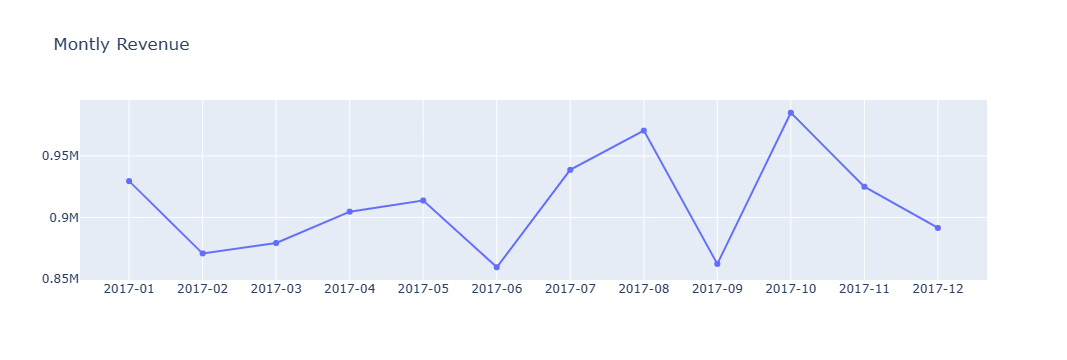

In [66]:
plot_data = [
    go.Scatter(
        x=margin_month['month_year'],
        y=margin_month['margin'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

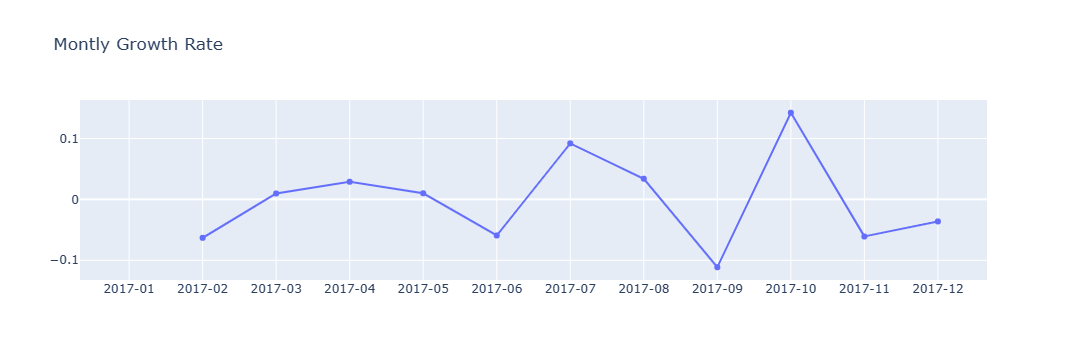

In [67]:
plot_data = [
    go.Scatter(
        x=margin_month['month_year'],
        y=margin_month['monthly_grow'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Growth Rate'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [68]:
customer_month = transs.groupby('month_year')['customer_id'].nunique().reset_index()
customer_month['month_year'] = customer_month['month_year'].astype(str)

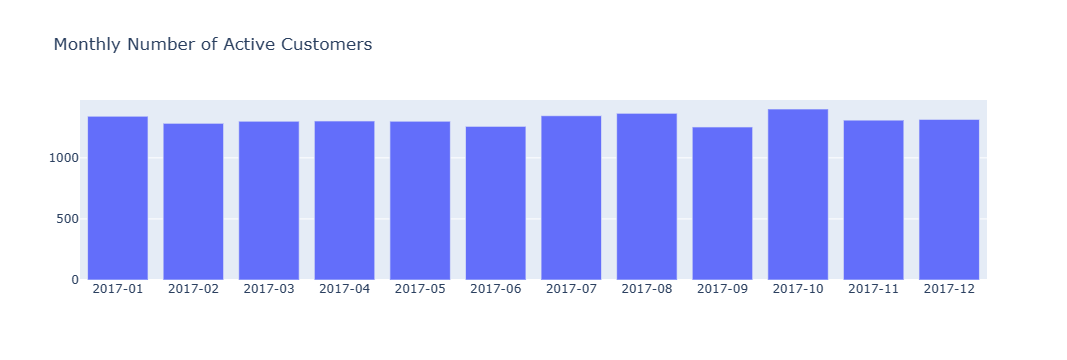

In [69]:
plot_data = [
    go.Bar(
        x=customer_month['month_year'],
        y=customer_month['customer_id'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Number of Active Customers '
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [70]:
transaction_month = transs.groupby('month_year').size().to_frame('size').reset_index()
transaction_month['month_year'] = transaction_month['month_year'].astype(str)

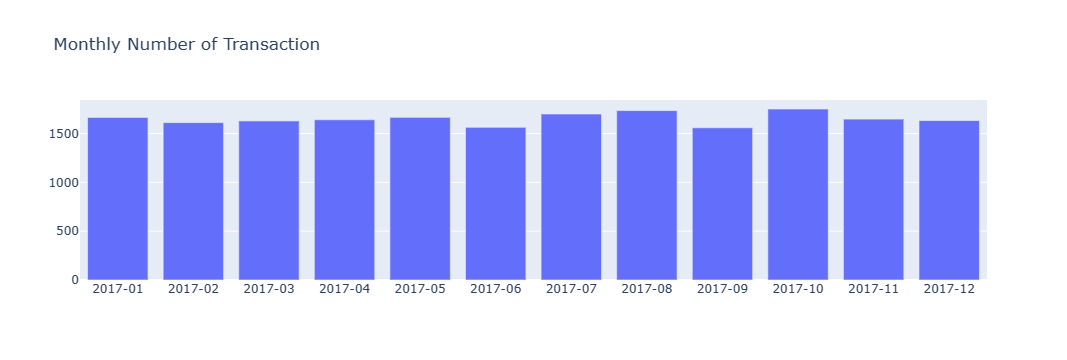

In [71]:
plot_data = [
    go.Bar(
        x=transaction_month['month_year'],
        y=transaction_month['size'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Number of Transaction'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [72]:
average_margin_month = transs.groupby('month_year')['margin'].mean().reset_index()
average_margin_month['month_year'] = average_margin_month['month_year'].astype(str)

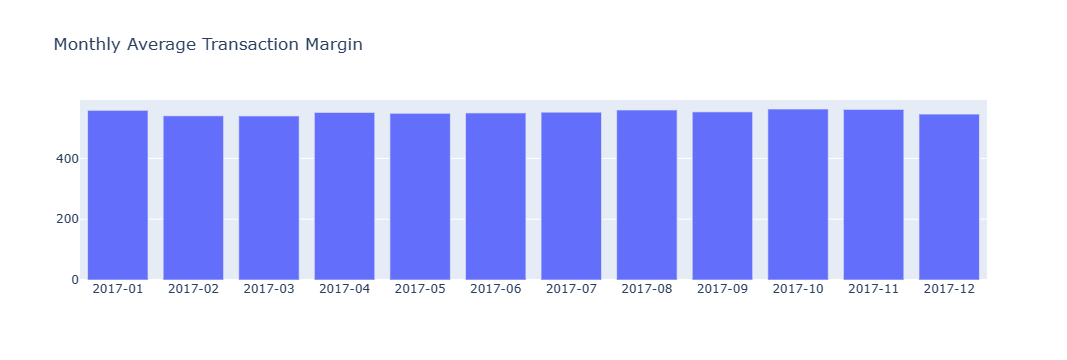

In [73]:
plot_data = [
    go.Bar(
        x=average_margin_month['month_year'],
        y=average_margin_month['margin'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Average Transaction Margin'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

### RFM Analysis

In [74]:
customer_cluster = transs.groupby('customer_id')['transaction_date'].max().reset_index()
customer_cluster.head()

customer_id transaction_date
0            1       2017-12-23
1            2       2017-08-24
2            3       2017-09-19
3            4       2017-06-18
4            5       2017-12-14

In [75]:
customer_cluster['recency']  = (transs['transaction_date'].max() - customer_cluster['transaction_date']).dt.days
customer_cluster.recency.describe()

count    3494.000000
mean       61.383515
std        58.382418
min         0.000000
25%        17.000000
50%        44.000000
75%        86.000000
max       353.000000
Name: recency, dtype: float64

In [76]:
customer_cluster.head(3)

customer_id transaction_date  recency
0            1       2017-12-23        7
1            2       2017-08-24      128
2            3       2017-09-19      102

In [77]:
customer_cluster[customer_cluster['recency'] > 365 ].shape


(0, 3)

In [78]:
customer_cluster.loc[customer_cluster['recency'] > 365 ]

Empty DataFrame
Columns: [customer_id, transaction_date, recency]
Index: []

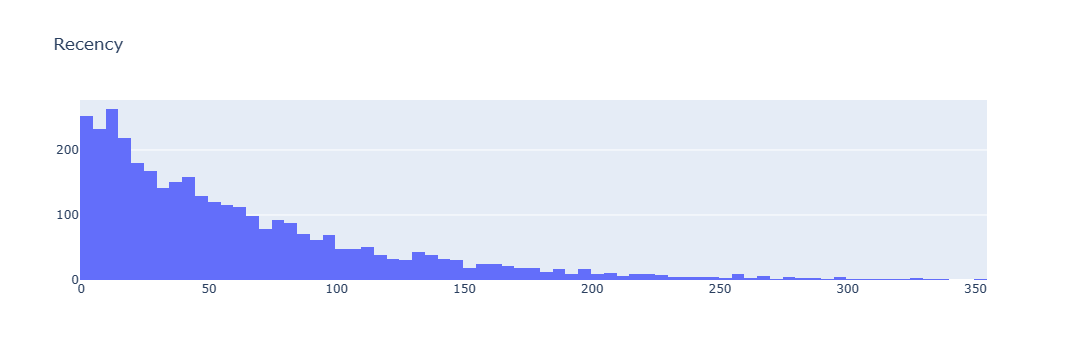

In [79]:
plot_data = [
    go.Histogram(
        x=customer_cluster['recency']
    )
]

plot_layout = go.Layout(
        title='Recency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

###  RFM Kmeans

In [80]:
#pip install xgboost

In [81]:
#pip install missingno

In [82]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import missingno as msno

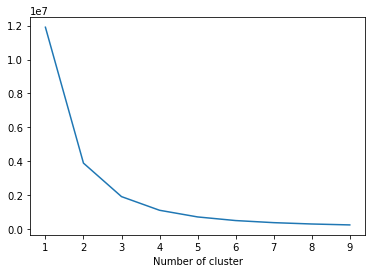

In [83]:
from sklearn.cluster import KMeans

sse={}
temp_recency = customer_cluster[['recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(temp_recency)
    temp_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure();
plt.plot(list(sse.keys()), list(sse.values()));
plt.xlabel("Number of cluster");
plt.show();

In [84]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(customer_cluster[['recency']])
customer_cluster['recency_cluster'] = kmeans.predict(customer_cluster[['recency']])


recency_customer_reorder = customer_cluster\
.groupby('recency_cluster')['recency']\
.describe()\
.sort_values(by = 'mean', ascending = False)\
.reset_index()

recency_customer_reorder.index.name = 'recency_cluster_reorder'

recency_customer_reorder = recency_customer_reorder.reset_index()
recency_customer_reorder

recency_cluster_reorder  recency_cluster   count        mean        std  \
0                        0                1   356.0  194.044944  46.396250   
1                        1                2  1077.0   89.311978  23.571673   
2                        2                0  2061.0   23.874333  16.173550   

     min    25%    50%    75%    max  
0  142.0  159.0  179.5  218.0  353.0  
1   57.0   69.0   84.0  107.0  141.0  
2    0.0   10.0   21.0   38.0   56.0

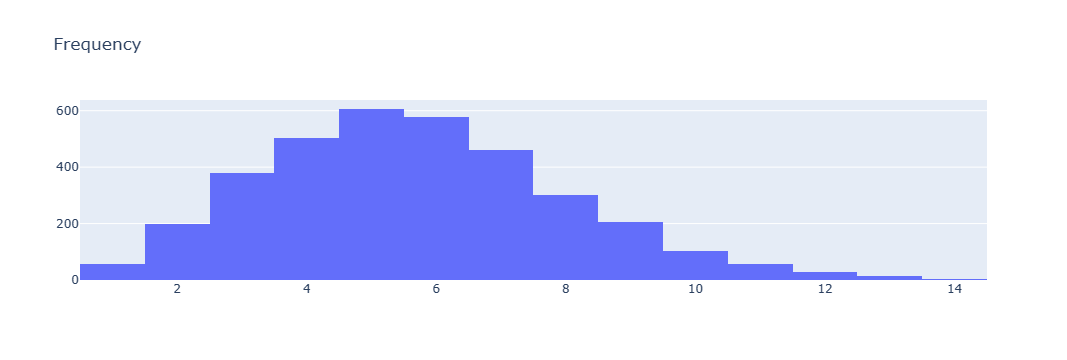

In [85]:
frequency_customer = transs.groupby('customer_id')['transaction_id'].count().reset_index()
customer_cluster['frequency'] = frequency_customer['transaction_id']



plot_data = [
    go.Histogram(
    x = customer_cluster['frequency']
    )
]

plot_layout = go.Layout(
    title = 'Frequency'
)

fig = go.Figure(data = plot_data, layout = plot_layout)

pyoff.iplot(fig)

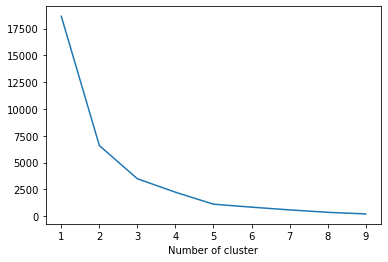

In [86]:
sse={}
temp_frequency = customer_cluster[['frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(temp_frequency)
    temp_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure();
plt.plot(list(sse.keys()), list(sse.values()));
plt.xlabel("Number of cluster");
plt.show();

In [87]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(customer_cluster[['frequency']])
customer_cluster['frequency_cluster'] = kmeans.predict(customer_cluster[['frequency']])


frequency_customer_reorder = customer_cluster\
.groupby('frequency_cluster')['frequency']\
.describe()\
.sort_values(by = 'mean')\
.reset_index()

frequency_customer_reorder.index.name = 'frequency_cluster_reorder'

frequency_customer_reorder.reset_index(inplace = True)

frequency_customer_reorder

frequency_cluster_reorder  frequency_cluster   count      mean       std  \
0                          0                  1  1138.0  3.171353  0.885526   
1                          1                  0  1644.0  5.912409  0.801470   
2                          2                  2   712.0  9.092697  1.281636   

   min  25%  50%   75%   max  
0  1.0  3.0  3.0   4.0   4.0  
1  5.0  5.0  6.0   7.0   7.0  
2  8.0  8.0  9.0  10.0  14.0

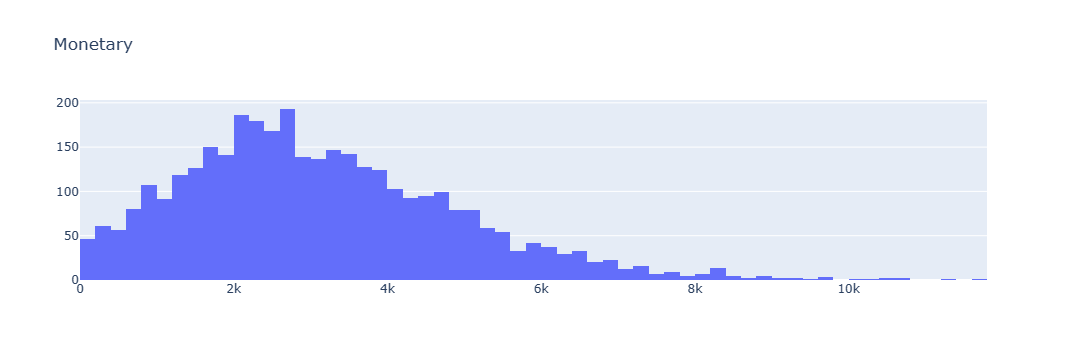

In [88]:
margin_customer = transs.groupby('customer_id')['margin'].sum().reset_index()
customer_cluster['monetary'] = margin_customer['margin']
plot_data = [
    go.Histogram(
    x = customer_cluster['monetary']
    )
]

plot_layout = go.Layout(
    title = 'Monetary'
)

fig = go.Figure(data = plot_data, layout = plot_layout)

pyoff.iplot(fig)

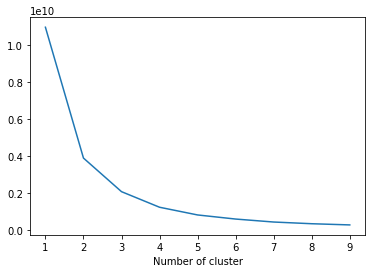

In [89]:
sse={}
temp_margin = customer_cluster[['monetary']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(temp_margin)
    temp_margin["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure();
plt.plot(list(sse.keys()), list(sse.values()));
plt.xlabel("Number of cluster");
plt.show();

In [90]:
customer_cluster.head(2)

customer_id transaction_date  recency  recency_cluster  frequency  \
0            1       2017-12-23        7                0         11   
1            2       2017-08-24      128                2          3   

   frequency_cluster  monetary  
0                  2   3018.09  
1                  1   2226.26

In [91]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(customer_cluster[['monetary']])
customer_cluster['margin_cluster'] = kmeans.predict(customer_cluster[['monetary']])


margin_customer_reorder = customer_cluster\
.groupby('margin_cluster')['monetary']\
.describe()\
.sort_values(by = 'mean')\
.reset_index()

margin_customer_reorder.index.name = 'margin_cluster_reorder'
margin_customer_reorder.reset_index(inplace = True)


margin_customer_reorder

margin_cluster_reorder  margin_cluster   count         mean          std  \
0                       0               1  1492.0  1572.775010   682.774175   
1                       1               0  1433.0  3572.175666   645.810905   
2                       2               2   569.0  6089.237118  1169.259987   

       min        25%       50%        75%       max  
0    15.08  1059.8675  1690.935  2158.7825   2574.50  
1  2580.59  3009.8900  3512.030  4078.8200   4837.19  
2  4839.41  5203.1800  5783.660  6579.6200  11668.95

In [92]:
recency_customer_reorder

recency_cluster_reorder  recency_cluster   count        mean        std  \
0                        0                1   356.0  194.044944  46.396250   
1                        1                2  1077.0   89.311978  23.571673   
2                        2                0  2061.0   23.874333  16.173550   

     min    25%    50%    75%    max  
0  142.0  159.0  179.5  218.0  353.0  
1   57.0   69.0   84.0  107.0  141.0  
2    0.0   10.0   21.0   38.0   56.0

In [93]:
all_clusters = customer_cluster\
.merge(margin_customer_reorder[['margin_cluster_reorder', 'margin_cluster']], on = 'margin_cluster')\
.merge(frequency_customer_reorder[['frequency_cluster_reorder', 'frequency_cluster']], on = 'frequency_cluster')\
.merge(recency_customer_reorder[['recency_cluster_reorder', 'recency_cluster']], on = 'recency_cluster')

In [94]:
c = ['customer_id', 'recency', 'frequency', 'monetary', 'recency_cluster_reorder', 'frequency_cluster_reorder', 'margin_cluster_reorder']

all_clusters['overall'] = all_clusters['recency_cluster_reorder'] + all_clusters['frequency_cluster_reorder'] + all_clusters['margin_cluster_reorder']

In [95]:
all_clusters.groupby('overall')['recency', 'frequency', 'monetary'].mean()

recency  frequency     monetary
overall                                    
0        205.497674   2.613953  1138.896512
1        110.607692   3.366667  1564.924782
2         61.289665   4.082969  1949.721150
3         51.189702   5.509485  2790.251491
4         37.160691   6.474104  3750.569535
5         30.428230   8.074163  4727.878947
6         22.423208   9.580205  6402.744915

In [96]:
all_clusters.head(2)

customer_id transaction_date  recency  recency_cluster  frequency  \
0            1       2017-12-23        7                0         11   
1           41       2017-12-01       29                0          9   

   frequency_cluster  monetary  margin_cluster  margin_cluster_reorder  \
0                  2   3018.09               0                       1   
1                  2   4698.89               0                       1   

   frequency_cluster_reorder  recency_cluster_reorder  overall  
0                          2                        2        5  
1                          2                        2        5

In [97]:
all_clusters['segment'] = 'Low-Value'
all_clusters.loc[all_clusters['overall'] > 2, 'segment'] = 'Mid-Value'
all_clusters.loc[all_clusters['overall'] > 4, 'segment'] = 'High-Value'

In [98]:
all_clusters.head(2)

customer_id transaction_date  recency  recency_cluster  frequency  \
0            1       2017-12-23        7                0         11   
1           41       2017-12-01       29                0          9   

   frequency_cluster  monetary  margin_cluster  margin_cluster_reorder  \
0                  2   3018.09               0                       1   
1                  2   4698.89               0                       1   

   frequency_cluster_reorder  recency_cluster_reorder  overall     segment  
0                          2                        2        5  High-Value  
1                          2                        2        5  High-Value

In [99]:
all_clusters.loc[all_clusters['overall'] == 2]

customer_id transaction_date  recency  recency_cluster  frequency  \
1684           14       2017-11-13       47                0          3   
1685           38       2017-11-10       50                0          4   
1686           45       2017-11-17       43                0          3   
1687           72       2017-12-08       22                0          4   
1688           74       2017-12-02       28                0          3   
...           ...              ...      ...              ...        ...   
3190         3122       2017-08-09      143                1          5   
3191         3237       2017-07-07      176                1          7   
3192         3284       2017-03-27      278                1          6   
3193         3381       2017-06-18      195                1          5   
3194         3438       2017-07-09      174                1          5   

      frequency_cluster  monetary  margin_cluster  margin_cluster_reorder  \
1684                  1   1713.90               1                       0   
1685                  1   2025.34               1                       0   
1686                  1   1048.15               1                       0   
1687                  1   2559.78               1                       0   
1688                  1    966.52               1                       0   
...                 ...       ...             ...                     ...   
3190                  0   3920.90               0                       1   
3191                  0   3919.85               0                       1   
3192                  0   2969.04               0                       1   
3193                  0   4829.40               0                       1   
3194                  0   3180.64               0                       1   

      frequency_cluster_reorder  recency_cluster_reorder  overall    segment  
1684                          0                        2        2  Low-Value  
1685                          0                        2        2  Low-Value  
1686                          0                        2        2  Low-Value  
1687                          0                        2        2  Low-Value  
1688                          0                        2        2  Low-Value  
...                         ...                      ...      ...        ...  
3190                          1                        0        2  Low-Value  
3191                          1                        0        2  Low-Value  
3192                          1                        0        2  Low-Value  
3193                          1                        0        2  Low-Value  
3194                          1                        0        2  Low-Value  

[687 rows x 13 columns]

In [100]:
all_clusters.head(2)

customer_id transaction_date  recency  recency_cluster  frequency  \
0            1       2017-12-23        7                0         11   
1           41       2017-12-01       29                0          9   

   frequency_cluster  monetary  margin_cluster  margin_cluster_reorder  \
0                  2   3018.09               0                       1   
1                  2   4698.89               0                       1   

   frequency_cluster_reorder  recency_cluster_reorder  overall     segment  
0                          2                        2        5  High-Value  
1                          2                        2        5  High-Value

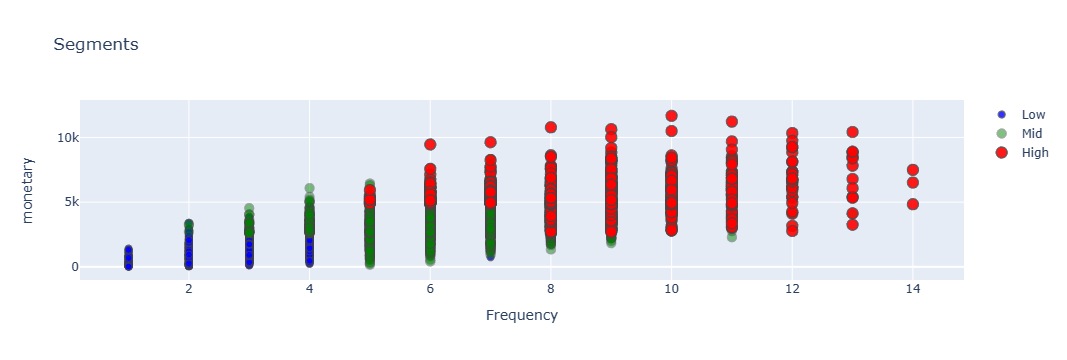

In [101]:
# Margin VS Frequency
plot_data = [
    go.Scatter(
        x=all_clusters.query("segment == 'Low-Value'")['frequency'],
        y=all_clusters.query("segment == 'Low-Value'")['monetary'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=all_clusters.query("segment == 'Mid-Value'")['frequency'],
        y=all_clusters.query("segment == 'Mid-Value'")['monetary'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
    go.Scatter(
        x=all_clusters.query("segment == 'High-Value'")['frequency'],
        y=all_clusters.query("segment == 'High-Value'")['monetary'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)
    

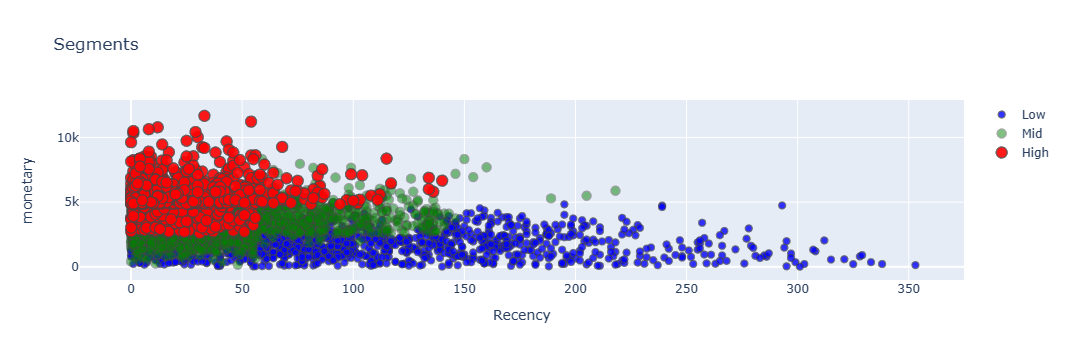

In [102]:
# Margin VS Recency
plot_data = [
    go.Scatter(
        x=all_clusters.query("segment == 'Low-Value'")['recency'],
        y=all_clusters.query("segment == 'Low-Value'")['monetary'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=all_clusters.query("segment == 'Mid-Value'")['recency'],
        y=all_clusters.query("segment == 'Mid-Value'")['monetary'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
     go.Scatter(
        x=all_clusters.query("segment == 'High-Value'")['recency'],
        y=all_clusters.query("segment == 'High-Value'")['monetary'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

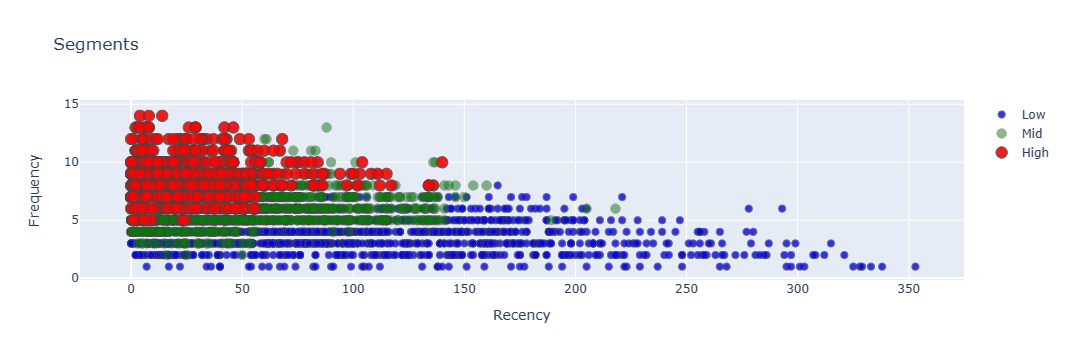

In [103]:
# Margin VS Frequency
plot_data = [
    go.Scatter(
        x=all_clusters.query("segment == 'Low-Value'")['recency'],
        y=all_clusters.query("segment == 'Low-Value'")['frequency'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=all_clusters.query("segment == 'Mid-Value'")['recency'],
        y=all_clusters.query("segment == 'Mid-Value'")['frequency'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=all_clusters.query("segment == 'High-Value'")['recency'],
        y=all_clusters.query("segment == 'High-Value'")['frequency'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]
plot_layout = go.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


### Customer lifetime 

- Define an appropriate time frame for Customer Lifetime Value calculation
- Identify the features we are going to use to predict future and create them
- Caluculate lifetime value (LTV) for training the machine learning algorithm
- Check if the model is useful

Lifetime Value: total Gross Revenue - Total Cost. In our case, Lifetime Value: list_price - standard_cost

In [104]:
"""import plotly.express as px

fig = px.scatter_matrix(
    all_clusters, 
    dimensions=['recency', 'frequency', 'monetary'],
    color='segment',
    title='Scatter Matrix Plot of Clusters'
)
#fig.update_traces(diagonal_visible=False)
fig.show()
"""

"import plotly.express as px\n\nfig = px.scatter_matrix(\n    all_clusters, \n    dimensions=['recency', 'frequency', 'monetary'],\n    color='segment',\n    title='Scatter Matrix Plot of Clusters'\n)\n#fig.update_traces(diagonal_visible=False)\nfig.show()\n"

<AxesSubplot:xlabel='overall', ylabel='monetary'>

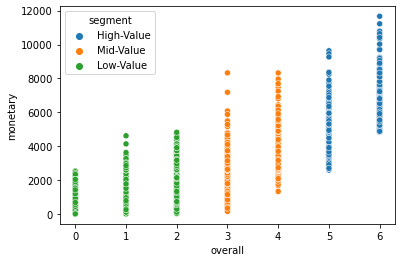

In [105]:
sns.scatterplot(x = all_clusters['overall'], y = all_clusters['monetary'], hue = all_clusters['segment'])

merge customer address with customer demo. 
trus merge sama all cluster

margin_y ? apa itu


In [106]:
CustAdd.head(2)

customer_id              address  postcode state    country  \
0            1   060 Morning Avenue      2016   NSW  Australia   
1            2  6 Meadow Vale Court      2153   NSW  Australia   

   property_valuation  
0                  10  
1                  10

In [107]:
customer = CustDemo.merge(CustAdd[['state','address','country','postcode', 'property_valuation','customer_id']], on = 'customer_id')

In [108]:
customer.head(2)

customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            2        Eli    Bockman    Male   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   

  job_industry_category wealth_segment deceased_indicator owns_car  tenure  \
0                Health  Mass Customer                  N      Yes    11.0   
1    Financial Services  Mass Customer                  N      Yes    16.0   

   Age state              address    country  postcode  property_valuation  
0   69   NSW   060 Morning Avenue  Australia      2016                  10  
1   42   NSW  6 Meadow Vale Court  Australia      2153                  10

In [109]:
transs.head(2)

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   

  order_status          brand product_line product_class product_size  \
0     Approved          Solex     Standard        medium       medium   
1     Approved  Trek Bicycles     Standard        medium        large   

   list_price  standard_cost product_first_sold_date trans_year trans_month  \
0       71.49          53.62              2012-12-02       2017    February   
1     2091.47         388.92              2014-03-03       2017         May   

  trans_day day_of_the week month_year   margin  
0        25        Saturday    2017-02    17.87  
1        21          Sunday    2017-05  1702.55

In [110]:
#transs.product_class.unique()

In [111]:
cust_transs = customer.merge(transs[['customer_id','transaction_id','product_id','transaction_date','brand','product_class','product_line','product_size','list_price','product_first_sold_date','standard_cost','margin','month_year','trans_year','trans_month']], on = 'customer_id')
cust_transs.head(2)

customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            1    Laraine  Medendorp  Female   

   past_3_years_bike_related_purchases        DOB            job_title  \
0                                   93 1953-10-12  Executive Secretary   
1                                   93 1953-10-12  Executive Secretary   

  job_industry_category wealth_segment deceased_indicator  ... product_class  \
0                Health  Mass Customer                  N  ...        medium   
1                Health  Mass Customer                  N  ...        medium   

   product_line  product_size list_price product_first_sold_date  \
0      Standard        medium     235.63              2005-05-10   
1      Standard        medium    1577.53              2008-03-19   

  standard_cost  margin  month_year  trans_year  trans_month  
0        125.07  110.56     2017-12        2017     December  
1        826.51  751.02     2017-04        2017        April  

[2 rows x 32 columns]

In [112]:
customer_trans = cust_transs.merge(all_clusters)
customer_trans.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age', 'state', 'address', 'country', 'postcode',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'brand', 'product_class', 'product_line',
       'product_size', 'list_price', 'product_first_sold_date',
       'standard_cost', 'margin', 'month_year', 'trans_year', 'trans_month',
       'recency', 'recency_cluster', 'frequency', 'frequency_cluster',
       'monetary', 'margin_cluster', 'margin_cluster_reorder',
       'frequency_cluster_reorder', 'recency_cluster_reorder', 'overall',
       'segment'],
      dtype='object')

In [113]:
customer_trans.head(2)

customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            2        Eli    Bockman    Male   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   

  job_industry_category wealth_segment deceased_indicator  ...  \
0                Health  Mass Customer                  N  ...   
1    Financial Services  Mass Customer                  N  ...   

  recency_cluster  frequency  frequency_cluster monetary margin_cluster  \
0               0         11                  2  3018.09              0   
1               2          3                  1  2226.26              1   

  margin_cluster_reorder  frequency_cluster_reorder  recency_cluster_reorder  \
0                      1                          2                        2   
1                      0                          0                        1   

   overall     segment  
0        5  High-Value  
1        1   Low-Value  

[2 rows x 43 columns]

In [114]:
customer_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3504 entries, 0 to 3503
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3504 non-null   int64         
 1   first_name                           3504 non-null   object        
 2   last_name                            3392 non-null   object        
 3   gender                               3504 non-null   object        
 4   past_3_years_bike_related_purchases  3504 non-null   int64         
 5   DOB                                  3504 non-null   datetime64[ns]
 6   job_title                            3504 non-null   object        
 7   job_industry_category                3504 non-null   object        
 8   wealth_segment                       3504 non-null   object        
 9   deceased_indicator                   3504 non-null   object        
 10  owns_car    

<AxesSubplot:xlabel='recency_cluster_reorder'>

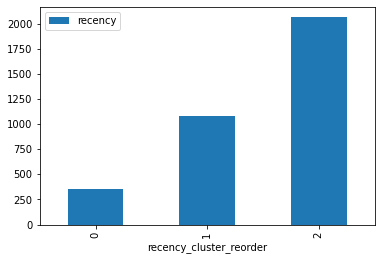

In [115]:
customer_trans.groupby('recency_cluster_reorder').agg('recency').count().to_frame().plot(kind='bar')

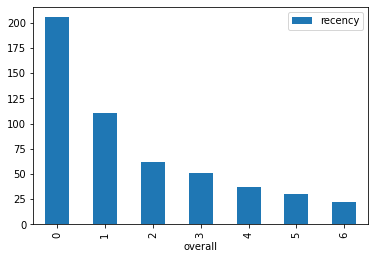

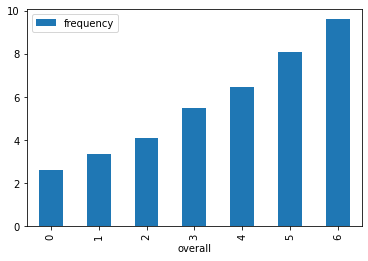

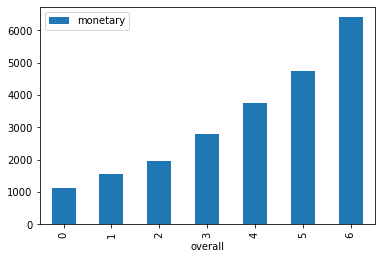

In [116]:
customer_trans.groupby('overall').agg('recency').mean().to_frame().plot(kind='bar')
customer_trans.groupby('overall').agg('frequency').mean().to_frame().plot(kind='bar')
customer_trans.groupby('overall').agg('monetary').mean().to_frame().plot(kind='bar')
plt.show()


In [117]:
customer_trans['rfm_class'] = 100 * customer_trans['recency_cluster_reorder'] + 10 * customer_trans['frequency_cluster_reorder'] + customer_trans['margin_cluster_reorder']
customer_trans.head(2)

customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            2        Eli    Bockman    Male   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   

  job_industry_category wealth_segment deceased_indicator  ... frequency  \
0                Health  Mass Customer                  N  ...        11   
1    Financial Services  Mass Customer                  N  ...         3   

   frequency_cluster  monetary margin_cluster margin_cluster_reorder  \
0                  2   3018.09              0                      1   
1                  1   2226.26              1                      0   

  frequency_cluster_reorder  recency_cluster_reorder  overall     segment  \
0                         2                        2        5  High-Value   
1                         0                        1        1   Low-Value   

   rfm_class  
0        221  
1        100  

[2 rows x 44 columns]

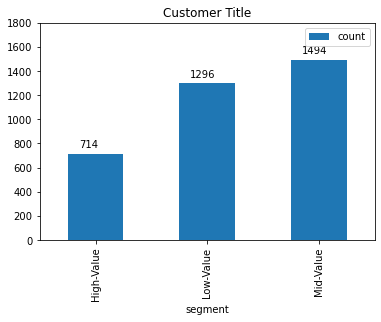

In [118]:
customer_titles_df = customer_trans.groupby('segment').agg({
    'rfm_class': lambda x: len(x)
})
customer_titles_df.rename(columns={'rfm_class': 'count'}, inplace=True)
customer_titles_df.sort_values('count').plot(kind='bar')
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Title')
plt.show()

In [119]:
def age_group(age):
    if age <= 29:
        return "20"
    elif age <= 39:
        return "30"
    elif age <= 49:
        return "40"
    elif age <= 59:
        return "50"
    else:
        return "60+"

customer_trans["age_group"] = customer_trans["Age"].apply(age_group)
customer_trans["age_group"]

0       60+
1        40
2       60+
3        40
4        50
       ... 
3499     30
3500     30
3501     20
3502     40
3503     50
Name: age_group, Length: 3504, dtype: object

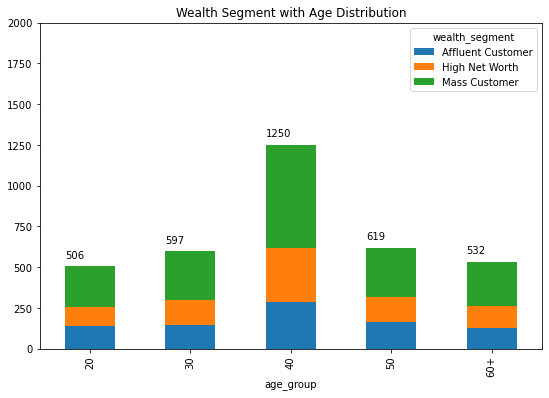

In [120]:
customer_trans.groupby('age_group')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True, figsize =(9,6))
for i, v in enumerate(customer_trans.groupby('age_group') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 2000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

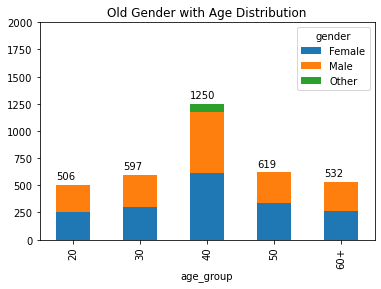

In [121]:
customer_trans.groupby('age_group')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(customer_trans.groupby('age_group') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 2000])
plt.title('Old Gender with Age Distribution')
plt.show()

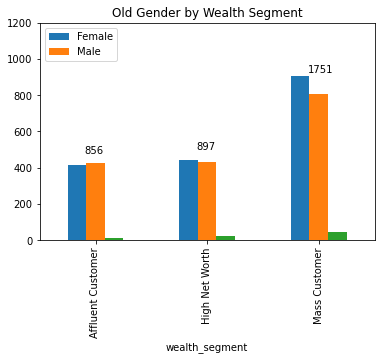

In [122]:
customer_trans.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(customer_trans.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1200])
plt.title('Old Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

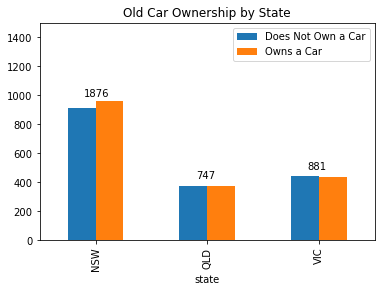

In [123]:
customer_trans.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(customer_trans.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1500])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

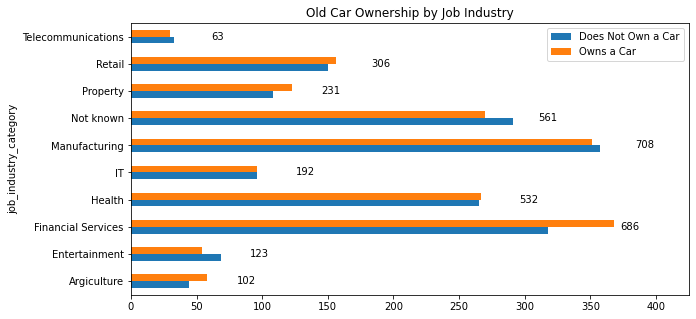

In [124]:
customer_trans.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False, figsize=(10,5))
for i, v in enumerate(customer_trans.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

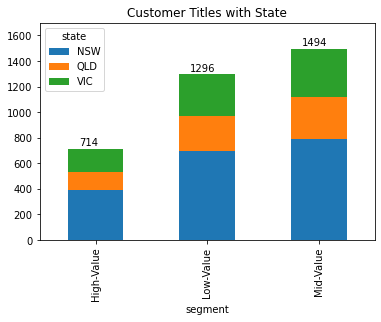

In [125]:
customer_trans.groupby('segment')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(customer_trans.groupby('segment') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1700])
plt.title('Customer Titles with State')
plt.show()

In [126]:
customer_trans['overall'].unique()

array([5, 1, 0, 3, 6, 2, 4], dtype=int64)

In [127]:
customer_trans.groupby('overall')['recency', 'frequency', 'monetary'].mean()

recency  frequency     monetary
overall                                    
0        205.361111   2.615741  1137.870694
1        110.625641   3.369231  1565.485077
2         61.453623   4.091304  1951.312957
3         51.181081   5.506757  2792.779716
4         37.220159   6.480106  3751.337042
5         30.470167   8.071599  4729.342912
6         22.545763   9.593220  6403.540339

In [128]:
customer_trans['customer_segment'] = customer_trans['overall'].map({
    6: 'High Value Customer',
    5: 'Loyal',
    4: 'Potential',
    3: 'Average',
    2: 'Promising',
    1: 'Need Attention',
    0: 'Inactive',
})
customer_trans.head()

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp  Female   
1            2             Eli    Bockman    Male   
2            4          Talbot        NaN    Male   
3            5  Sheila-kathryn     Calton  Female   
4            6            Curr  Duckhouse    Male   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   33 1961-10-03               Not known   
3                                   56 1977-05-13           Senior Editor   
4                                   35 1966-09-16               Not known   

  job_industry_category     wealth_segment deceased_indicator  ... monetary  \
0                Health      Mass Customer                  N  ...  3018.09   
1    Financial Services      Mass Customer                  N  ...  2226.26   
2                    IT      Mass Customer                  N  ...   220.57   
3             Not known  Affluent Customer                  N  ...  2394.94   
4                Retail     High Net Worth                  N  ...  3946.55   

   margin_cluster  margin_cluster_reorder frequency_cluster_reorder  \
0               0                       1                         2   
1               1                       0                         0   
2               1                       0                         0   
3               1                       0                         1   
4               0                       1                         1   

  recency_cluster_reorder overall     segment  rfm_class  age_group  \
0                       2       5  High-Value        221        60+   
1                       1       1   Low-Value        100         40   
2                       0       0   Low-Value          0        60+   
3                       2       3   Mid-Value        210         40   
4                       1       3   Mid-Value        111         50   

   customer_segment  
0             Loyal  
1    Need Attention  
2          Inactive  
3           Average  
4           Average  

[5 rows x 46 columns]

In [129]:
#top_1000 = customer_trans.sort_values('rfm_class').head(1000)
top_1000 = customer_trans.sort_values(['rfm_class'], ascending=False).head(1000)
top_1000

customer_id first_name last_name  gender  \
2934         2929      Winny     Cakes    Male   
885           887  Patrizius  Hardinge    Male   
2730         2726   Bradford   Monkton    Male   
209           213   Lockwood    Exroll    Male   
1472         1473    Darrick     Feake    Male   
...           ...        ...       ...     ...   
184           188      Audry     Seine  Female   
217           221       Mara    Bloore  Female   
216           220   Jeniffer     Apark  Female   
1467         1468    Adaline    Hayles  Female   
1470         1471      Berri      Farr  Female   

      past_3_years_bike_related_purchases        DOB               job_title  \
2934                                   97 1999-07-28                   Nurse   
885                                    55 1997-11-17               Not known   
2730                                   49 1976-03-18  Administrative Officer   
209                                    13 1996-05-14                 Actuary   
1472                                   49 1960-04-21   VP Product Management   
...                                   ...        ...                     ...   
184                                    54 1975-06-22    Safety Technician II   
217                                    14 1980-03-10          Tax Accountant   
216                                    79 1954-05-10     Electrical Engineer   
1467                                   37 1978-01-10       Financial Advisor   
1470                                   88 1978-02-24               Not known   

     job_industry_category     wealth_segment deceased_indicator  ...  \
2934                Retail      Mass Customer                  N  ...   
885          Manufacturing     High Net Worth                  N  ...   
2730    Financial Services  Affluent Customer                  N  ...   
209     Financial Services     High Net Worth                  N  ...   
1472             Not known      Mass Customer                  N  ...   
...                    ...                ...                ...  ...   
184               Property     High Net Worth                  N  ...   
217          Manufacturing      Mass Customer                  N  ...   
216          Manufacturing     High Net Worth                  N  ...   
1467    Financial Services      Mass Customer                  N  ...   
1470    Financial Services      Mass Customer                  N  ...   

     monetary  margin_cluster  margin_cluster_reorder  \
2934  6692.39               2                       2   
885   5247.44               2                       2   
2730  5318.75               2                       2   
209   8544.50               2                       2   
1472  6176.30               2                       2   
...       ...             ...                     ...   
184   2658.87               0                       1   
217   3865.68               0                       1   
216   4304.11               0                       1   
1467  3564.99               0                       1   
1470  4685.84               0                       1   

     frequency_cluster_reorder recency_cluster_reorder overall     segment  \
2934                         2                       2       6  High-Value   
885                          2                       2       6  High-Value   
2730                         2                       2       6  High-Value   
209                          2                       2       6  High-Value   
1472                         2                       2       6  High-Value   
...                        ...                     ...     ...         ...   
184                          1                       2       4   Mid-Value   
217                          1                       2       4   Mid-Value   
216                          1                       2       4   Mid-Value   
1467                         1                       2       4   Mid-Value   
1470                    

In [131]:
customer_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3504 entries, 0 to 3503
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3504 non-null   int64         
 1   first_name                           3504 non-null   object        
 2   last_name                            3392 non-null   object        
 3   gender                               3504 non-null   object        
 4   past_3_years_bike_related_purchases  3504 non-null   int64         
 5   DOB                                  3504 non-null   datetime64[ns]
 6   job_title                            3504 non-null   object        
 7   job_industry_category                3504 non-null   object        
 8   wealth_segment                       3504 non-null   object        
 9   deceased_indicator                   3504 non-null   object        
 10  owns_car    

In [130]:
customers_trans_ltv = customer_trans.merge(all_clusters[['monetary', 'customer_id']], on = 'customer_id')
customers_trans_ltv.head(2)

customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            2        Eli    Bockman    Male   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   

  job_industry_category wealth_segment deceased_indicator  ... margin_cluster  \
0                Health  Mass Customer                  N  ...              0   
1    Financial Services  Mass Customer                  N  ...              1   

   margin_cluster_reorder  frequency_cluster_reorder recency_cluster_reorder  \
0                       1                          2                       2   
1                       0                          0                       1   

  overall     segment  rfm_class  age_group  customer_segment  monetary_y  
0       5  High-Value        221        60+             Loyal     3018.09  
1       1   Low-Value        100         40    Need Attention     2226.26  

[2 rows x 47 columns]

In [154]:
customers_trans_ltv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3504 entries, 0 to 3503
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3504 non-null   int64         
 1   first_name                           3504 non-null   object        
 2   last_name                            3392 non-null   object        
 3   gender                               3504 non-null   object        
 4   past_3_years_bike_related_purchases  3504 non-null   int64         
 5   DOB                                  3504 non-null   datetime64[ns]
 6   job_title                            3504 non-null   object        
 7   job_industry_category                3504 non-null   object        
 8   wealth_segment                       3504 non-null   object        
 9   deceased_indicator                   3504 non-null   object        
 10  owns_car    

In [153]:
customer_ltv = customer.merge(all_clusters[['monetary', 'customer_id']], on = 'customer_id')
customer_ltv.head(2)

customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            2        Eli    Bockman    Male   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   

  job_industry_category wealth_segment deceased_indicator owns_car  tenure  \
0                Health  Mass Customer                  N      Yes    11.0   
1    Financial Services  Mass Customer                  N      Yes    16.0   

   Age state              address    country  postcode  property_valuation  \
0   69   NSW   060 Morning Avenue  Australia      2016                  10   
1   42   NSW  6 Meadow Vale Court  Australia      2153                  10   

   monetary  
0   3018.09  
1   2226.26

Index(['gender', 'past_3_years_bike_related_purchases', 'wealth_segment',
       'owns_car', 'tenure', 'state', 'property_valuation', 'monetary', 'Age'],
      dtype='object')


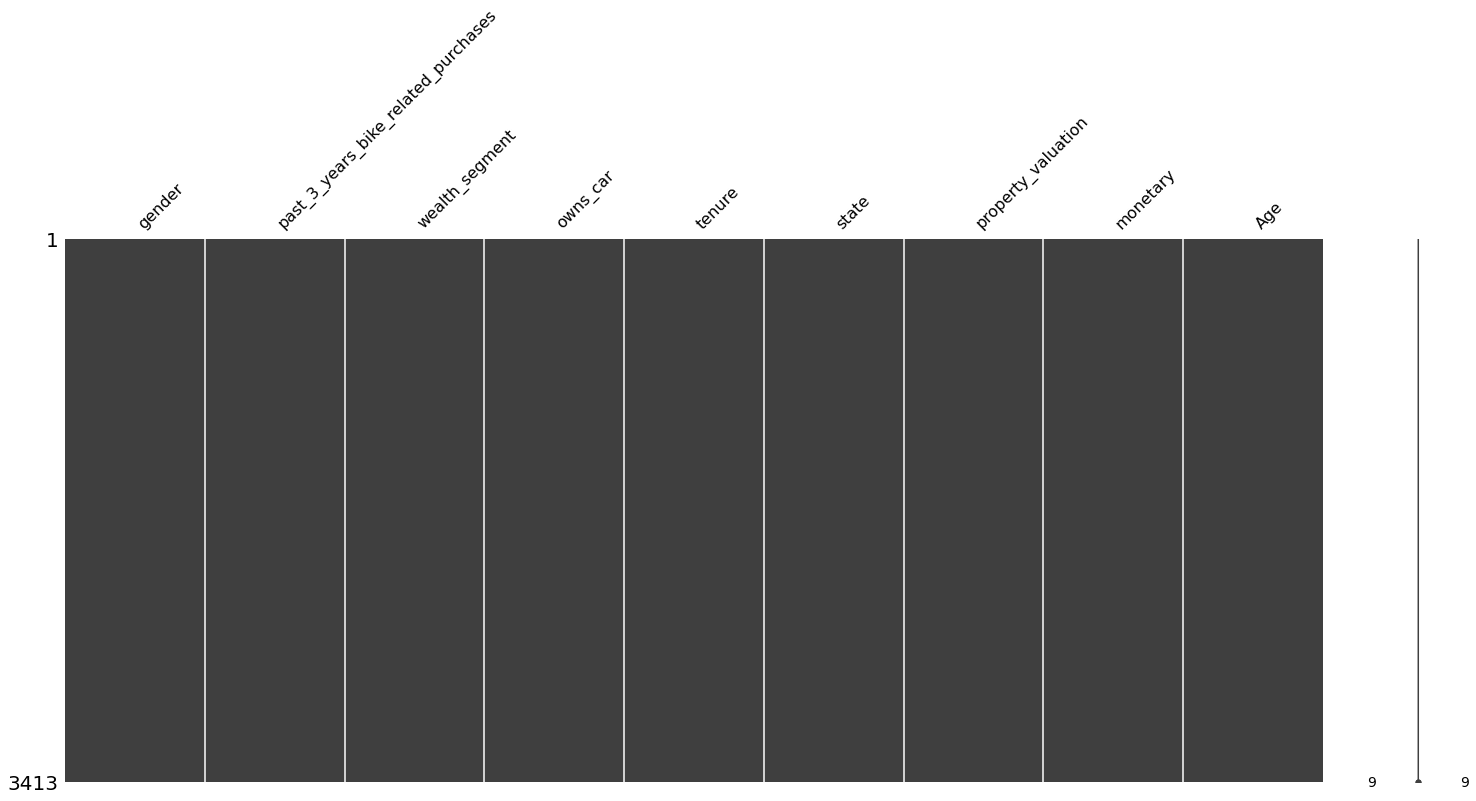

In [164]:
#customer_ltv = CustDemo.merge(all_clusters[['profit', 'customer_id']], on = 'customer_id')
#msno.matrix(customer_ltv[c])

c = ['gender', 'past_3_years_bike_related_purchases', 
     'wealth_segment', 'owns_car', 'tenure', 'state', 
     'property_valuation', 'monetary', 'Age']
customer_ltv_processing = customer_ltv[c].dropna()
msno.matrix(customer_ltv_processing)
print(customer_ltv_processing.columns)

## Modeling

In [165]:
def scaler_column(col, df):
    scaler = StandardScaler()
    scaler.fit(df[[col]])
    return scaler.transform(df[[col]])


In [167]:
customer_ltv_processing['Age'] = scaler_column('Age', customer_ltv_processing)
customer_ltv_processing['past_3_years_bike_related_purchases'] = scaler_column('past_3_years_bike_related_purchases', customer_ltv_processing)
customer_ltv_processing['tenure'] = scaler_column('tenure', customer_ltv_processing)
customer_ltv_processing['property_valuation'] = scaler_column('property_valuation', customer_ltv_processing)
customer_ltv_processing['monetary'] = scaler_column('monetary', customer_ltv_processing)

In [168]:
customer_ltv_split_ready = pd.get_dummies(customer_ltv_processing, drop_first = True)

print(customer_ltv_split_ready.columns)

X = customer_ltv_split_ready[['past_3_years_bike_related_purchases', 'tenure', 'Age', 'property_valuation',
    'gender_Male', 'wealth_segment_High Net Worth', 
       'wealth_segment_Mass Customer', 'owns_car_Yes',
       'state_QLD', 'state_VIC']]

y = customer_ltv_split_ready['monetary']

Index(['past_3_years_bike_related_purchases', 'tenure', 'property_valuation',
       'monetary', 'Age', 'gender_Male', 'gender_Other',
       'wealth_segment_High Net Worth', 'wealth_segment_Mass Customer',
       'owns_car_Yes', 'state_QLD', 'state_VIC'],
      dtype='object')


In [169]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.svm import SVR

#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [170]:
import statsmodels.api as sm
#poly = PolynomialFeatures(interactio)
#X = poly.fit_transform(X)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
#print(est2.summary())

RMSE on training data 0.9686645919266106
RSME on testing data 1.0928330503607873


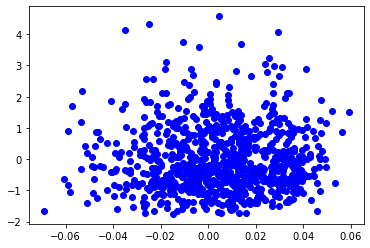

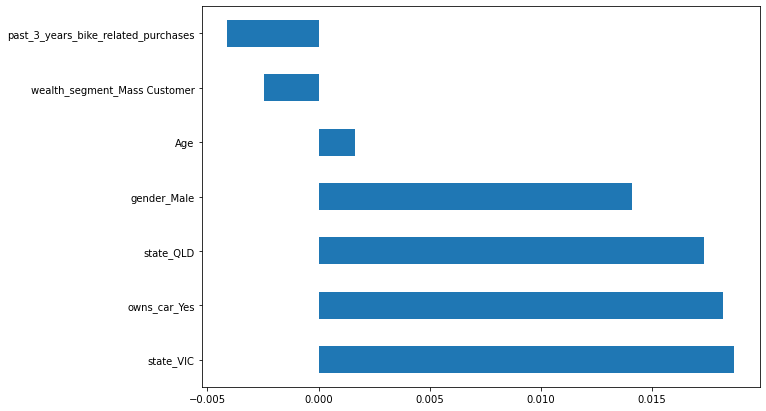

In [171]:
# create an object of thye linear regression model
model_LR = LinearRegression()
# fit the target on training data
model_LR.fit(X_train, y_train)
# predict the target on train and test data
predict_train = model_LR.predict(X_train)
predict_test = model_LR.predict(X_test)

# root mean squared error
print('RMSE on training data', mean_squared_error(y_train, predict_train))
print('RSME on testing data', mean_squared_error(y_test, predict_test))

plt.scatter(predict_test, y_test,color='blue')
#plt.plot(predict_test, y_test, color='blue', linewidth=3)

#model_LR.summary()

plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_LR.coef_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind='barh');

RMSE on training data 0.5407272436687267
RSME on testing data 1.1360401958050848


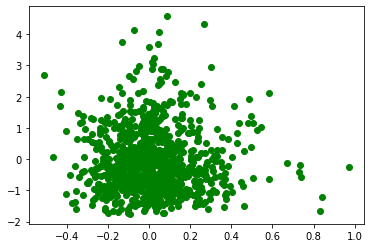

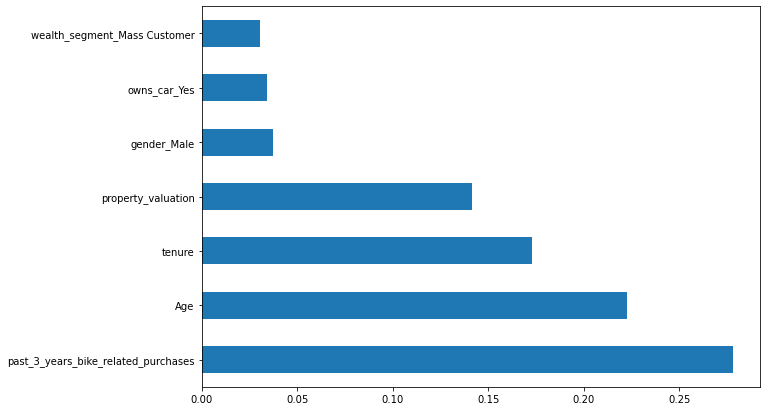

In [172]:
# create an object of thye linear regression model
model_RFR = RandomForestRegressor(max_depth = 10)
# fit the target on training data
model_RFR.fit(X_train, y_train)
# predict the target on train and test data
predict_train = model_RFR.predict(X_train)
predict_test = model_RFR.predict(X_test)

# root mean squared error
print('RMSE on training data', mean_squared_error(y_train, predict_train))
print('RSME on testing data', mean_squared_error(y_test, predict_test))

plt.scatter(predict_test, y_test,color='green');


plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind='barh');

1.4428083275814096
1.101392165662424


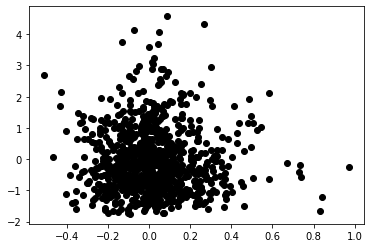

In [173]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

predict_temp = svr_rbf.fit(X_train, y_train).predict(X_test)
print(mean_squared_error(predict_temp, y_test))

predict_temp = svr_lin.fit(X_train, y_train).predict(X_test)
print(mean_squared_error(predict_temp, y_test))

#predict_temp = svr_poly.fit(X_train, y_train).predict(X_test)
#print(mean_squared_error(predict_temp, y_test))

plt.scatter(predict_test, y_test,color='black')

RMSE on training data 0.9121288912155415
RSME on testing data 1.1329723111437018


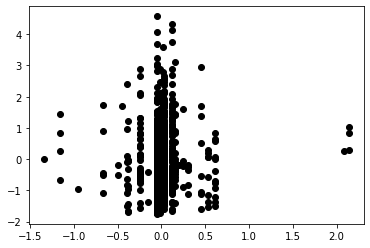

In [174]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth = 5)
DTR.fit(X_train, y_train)
predict_train = DTR.predict(X_train)
predict_test = DTR.predict(X_test)

print('RMSE on training data', mean_squared_error(y_train, predict_train))
print('RSME on testing data', mean_squared_error(y_test, predict_test))

plt.scatter(predict_test, y_test,color='black')

RMSE on training data 0.9529564006217709
RSME on testing data 1.0945177129943473


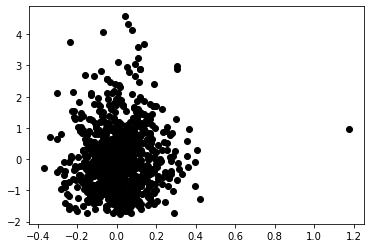

In [175]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(interaction_only = True)
X = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


model = LinearRegression()

model = model.fit(X_train, y_train)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

print('RMSE on training data', mean_squared_error(y_train, predict_train))
print('RSME on testing data', mean_squared_error(y_test, predict_test))

plt.scatter(predict_test, y_test,color='black')

## Extract to excel

In [133]:
writer = pd.ExcelWriter('KPMG_Data_Wrangling3.xlsx',
                        engine = 'xlsxwriter')
customer_trans.to_excel(writer, sheet_name = 'Sprocket_Cleaned')
top_1000.to_excel(writer, sheet_name = 'Top_1000')
writer.save()
writer.close()